## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, escapechar='\\')
study_results = pd.read_csv(study_results_path, escapechar='\\')

# Combine the data into a single dataset
combined_metadata_studyresults = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_metadata_studyresults

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice_df = combined_metadata_studyresults["Mouse ID"].nunique()
data = [total_mice_df] 
total_mice_df= pd.DataFrame(data, columns = ["Total Mice"])
total_mice_df

,Total Mice
0,249


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
find_duplicates_df = combined_metadata_studyresults[combined_metadata_studyresults.duplicated(["Mouse ID", "Timepoint"])]
find_duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_metadata_studyresults.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
cleaned_data_df.columns = [c.replace(' ', '_') for c in cleaned_data_df.columns]



In [6]:
cleaned_data_df = cleaned_data_df[cleaned_data_df.Mouse_ID != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
revised_total_mice_df = cleaned_data_df["Mouse_ID"].nunique()
data = [revised_total_mice_df] 
revised_total_mice_df= pd.DataFrame(data, columns = ["Total Mice"])
revised_total_mice_df

,Total Mice
0,248


## Summary Statistics

In [8]:
#cleaned_data_df.rename(columns = {'Tumor Volume (mm3)':'Tumor_Volume'}, inplace=True)


In [9]:
# Mean Tumor Volume
mean_grouped_drug_regimen_df = cleaned_data_df.groupby(['Drug_Regimen'])['Tumor_Volume_(mm3)'].mean().to_frame().rename(
         columns={'Drug_Regimen':'Mean'}).reset_index()
mean_grouped_drug_regimen_df.rename(columns={'Tumor_Volume_(mm3)' : 'Mean'}, inplace=True)

In [10]:
# Median Tumor Volume
median_grouped_drug_regimen_df = cleaned_data_df.groupby(['Drug_Regimen'])['Tumor_Volume_(mm3)'].median().to_frame().rename(
         columns={'Drug_Regimen':'Median'}).reset_index()
median_grouped_drug_regimen_df.rename(columns={'Tumor_Volume_(mm3)' : 'Median'}, inplace=True)

In [11]:
# Variance Tumor Volume
var_grouped_drug_regimen_df = cleaned_data_df.groupby(['Drug_Regimen'])['Tumor_Volume_(mm3)'].var().to_frame().rename(
         columns={'Drug_Regimen':'Variance'}).reset_index()
var_grouped_drug_regimen_df.rename(columns={'Tumor_Volume_(mm3)' : 'Variance'}, inplace=True)

In [13]:
# SD Tumor Volume
sd_grouped_drug_regimen_df = cleaned_data_df.groupby(['Drug_Regimen'])['Tumor_Volume_(mm3)'].std().to_frame().rename(
         columns={'Drug_Regimen':'Variance'}).reset_index()
sd_grouped_drug_regimen_df.rename(columns={'Tumor_Volume_(mm3)' : 'SD'}, inplace=True)

In [14]:
# SEM Tumor Volume
sem_grouped_drug_regimen_df = cleaned_data_df.groupby(['Drug_Regimen'])['Tumor_Volume_(mm3)'].sem().to_frame().rename(
         columns={'Drug_Regimen':'Variance'}).reset_index()
sem_grouped_drug_regimen_df.rename(columns={'Tumor_Volume_(mm3)' : 'SEM'}, inplace=True)

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
merge_mean_median_df =pd.merge(mean_grouped_drug_regimen_df, median_grouped_drug_regimen_df, on ='Drug_Regimen')
merge_with_var_df = pd.merge(merge_mean_median_df, var_grouped_drug_regimen_df, on ='Drug_Regimen')
merge_with_sd_df = pd.merge(merge_with_var_df, sd_grouped_drug_regimen_df , on ='Drug_Regimen')
merge_all= pd.merge(merge_with_sd_df , sem_grouped_drug_regimen_df  , on ='Drug_Regimen')
merge_all.set_index('Drug_Regimen', drop=True) 


,Mean,Median,Variance,SD,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen').agg({"Tumor_Volume_(mm3)": ["mean", "median", "var", "std", "sem"]})
summary_grouped_drug_regimen_df 

Tumor_Volume_(mm3)                                          
                           mean     median        var       std       sem
Drug_Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
total_mice_regimen_df = cleaned_data_df.groupby('Drug_Regimen', as_index=False).Mouse_ID.count().sort_values("Mouse_ID", ascending=False)
#set_index_df = total_mice_regimen_df.set_index('Drug_Regimen', drop=True)
#set_index_df.sort_values("Mouse_ID", ascending=False)
total_mice_regimen_df

,Drug_Regimen,Mouse_ID
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


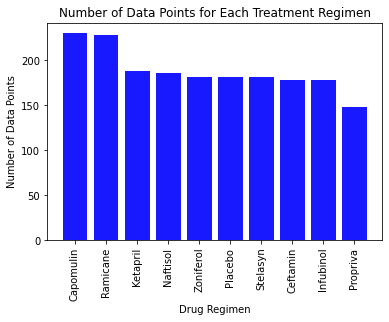

In [18]:
# Use Pandas to generate a bar plot showing the total number of data points in each treatment regimen throughout the course of the study. 
plt.bar(x = total_mice_regimen_df['Drug_Regimen'], height =total_mice_regimen_df['Mouse_ID'], color='b', alpha=0.9, align="center")
plt.xticks(rotation=90)
plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

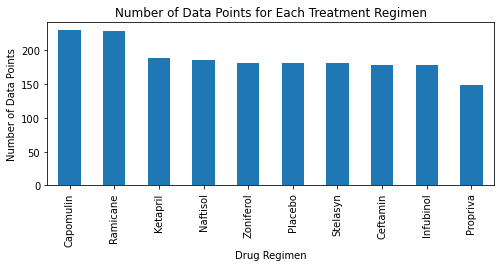

In [20]:
 # Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
total_mice_regimen_df.plot(kind="bar",  figsize=(8,3))

plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.legend().remove()
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
labels = ("Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva")

plt.xticks(positions, labels)

plt.show()

In [21]:
#Total Mice Indexed by Drug
#total_mice_regimen_df = cleaned_data_df.groupby('Drug_Regimen', as_index=False).Mouse_ID.count()
#indexed_total_mice_regimen_df = total_mice_regimen_df.set_index('Drug_Regimen', drop=True) 

In [22]:
#drop Duplicate
dropped_dup_data_df = combined_metadata_studyresults.drop_duplicates(subset=['Mouse ID'])
dropped_dup_data_df.columns = [c.replace(' ', '_') for c in cleaned_data_df.columns]

In [23]:
# Total number of mice for each treatment throughout the course of the study using pandas. 
#total_mice_regimen_df = dropped_dup_data_df.groupby('Drug_Regimen', as_index=False).Mouse_ID.count()
#indexed_total_mice_regimen_df = total_mice_regimen_df.set_index('Drug_Regimen', drop=True) 

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


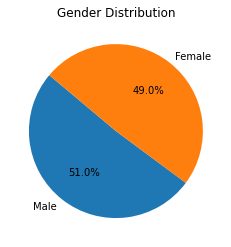

In [24]:
 # Use Pandas to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
gender_df = cleaned_data_df.Sex.value_counts().rename_axis('Gender').to_frame('Total Count')

##  Note: this plot will be identical to the one that uses Pandas
labels = "Male", "Female"

plt.pie(gender_df, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")


plt.show()

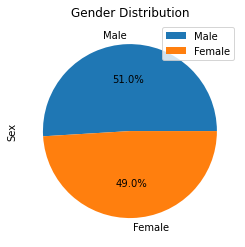

In [25]:
 # Use Pyplot to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot
#counted_gender_df =  cleaned_data_df.sex.value_counts().rename_axis('Gender').to_frame('Total Count')
cleaned_data_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.legend(labels, loc="best")

plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
cleaned_data_df.sort_values("Timepoint", ascending=False)

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1344,p136,Zoniferol,Female,5,28,45,63.488697,2
874,g296,Zoniferol,Female,14,29,45,68.163195,4
884,g497,Ketapril,Male,19,28,45,69.872251,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
1170,m269,Stelasyn,Female,22,28,0,45.000000,0
1164,m133,Naftisol,Female,2,26,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
1153,l733,Ceftamin,Female,4,30,0,45.000000,0


In [27]:
# Activity 3.2
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = cleaned_data_df.drop_duplicates(subset='Mouse_ID', keep="last")
indexed_last_timepoint_df = last_timepoint_df.set_index('Drug_Regimen')
final_volume_df = indexed_last_timepoint_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_vol = []
Ceftamin_vol = []
Infubinol_vol = []
Ramicane_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
cap_vol = final_volume_df.loc[["Capomulin"]]
cap_vol = cap_vol.reset_index(drop=True)

ram_vol = final_volume_df.loc[["Ramicane"]]
ram_vol = ram_vol.reset_index(drop=True)

inf_vol = final_volume_df.loc[["Infubinol"]]
inf_vol = inf_vol.reset_index(drop=True)
    
cef_vol = final_volume_df.loc[["Ceftamin"]]
cef_vol = cef_vol.reset_index(drop=True) 



In [29]:
# Determine outliers using upper and lower bounds
cef_tumor_volume_df = cef_vol["Tumor_Volume_(mm3)"]
quartiles = cef_tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = cef_tumor_volume_df.loc[
                                (cef_vol["Tumor_Volume_(mm3)"] < lower_bound) |\
                                   (cef_vol["Tumor_Volume_(mm3)"] > upper_bound)]
if len(outliers)>0:
    print (f"Ceftamin has {len(outliers)} outlier(s).")
else: 
    print (f"Ceftamin has {len(outliers)} outliers.")

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin has 0 outliers.


In [30]:
# Determine outliers using upper and lower bounds for Ramicane
ram_tumor_volume_df = ram_vol["Tumor_Volume_(mm3)"]
quartiles = ram_tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = ram_tumor_volume_df.loc[
                                (ram_vol["Tumor_Volume_(mm3)"] < lower_bound) |\
                                   (ram_vol["Tumor_Volume_(mm3)"] > upper_bound)]
if len(outliers)>0:
    print (f"Ramicane has {len(outliers)} outlier(s).")
else: 
    print (f"Ramicane has {len(outliers)} outliers.")

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has 0 outliers.


In [32]:
# Determine outliers using upper and lower bounds for Infubinol
inf_tumor_volume_df = inf_vol["Tumor_Volume_(mm3)"]
quartiles = inf_tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = inf_tumor_volume_df.loc[
                                (inf_vol["Tumor_Volume_(mm3)"] < lower_bound) |\
                                   (inf_vol["Tumor_Volume_(mm3)"] > upper_bound)]
if len(outliers)>0:
    print (f"Infubinol has {len(outliers)} outlier(s).")
else: 
    print (f"Infubinol has {len(outliers)} outliers.")

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol has 1 outlier(s).


In [33]:
# Determine outliers using upper and lower bounds for Capomulin
cap_tumor_volume_df = cap_vol["Tumor_Volume_(mm3)"]
quartiles = cap_tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = cap_tumor_volume_df.loc[
                                (cap_vol["Tumor_Volume_(mm3)"] < lower_bound) |\
                                   (cap_vol["Tumor_Volume_(mm3)"] > upper_bound)]
if len(outliers)>0:
    print (f"Capomulin has {len(outliers)} outlier(s).")
else: 
    print (f"Capomulin has {len(outliers)} outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has 0 outliers.


In [36]:
data_1 = cap_vol["Tumor_Volume_(mm3)"]
data_2 = ram_vol["Tumor_Volume_(mm3)"] 
data_3 = inf_vol["Tumor_Volume_(mm3)"]
data_4 = cef_vol["Tumor_Volume_(mm3)"]
data = [data_1, data_2, data_3, data_4] 

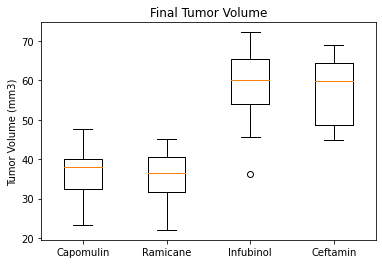

In [37]:
plt.boxplot(data)
positions = (1, 2, 3, 4)
labels = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
plt.title('Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(positions, labels)

plt.show()

## Line and Scatter Plots

In [38]:
# Find One Mouse
indexed_clean_data = cleaned_data_df.set_index('Mouse_ID')
one_mouse = indexed_clean_data.loc[["s185"]]


In [39]:
# Capomulin Only
one_drug_one_mouse = one_mouse.set_index('Drug_Regimen')


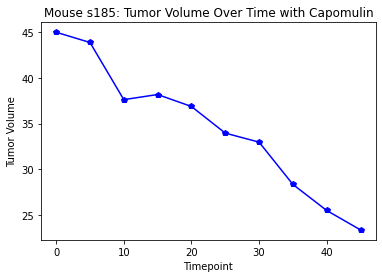

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = one_drug_one_mouse["Timepoint"]
y_axis = one_drug_one_mouse["Tumor_Volume_(mm3)"]
plt.plot(x_axis, y_axis, marker ='p', color='blue')
plt.title("Mouse s185: Tumor Volume Over Time with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()

In [41]:
# Find Capmulin
find_clean_data = cleaned_data_df.set_index('Drug_Regimen')
cap_only = find_clean_data.loc[["Capomulin"]]


In [42]:
tumor_mean = cap_only.groupby(['Mouse_ID'])['Tumor_Volume_(mm3)'].mean().to_frame().rename(
        columns={'Mouse_ID':'Mean'}).reset_index()

In [43]:
weight_mean = cap_only.groupby(['Mouse_ID'])['Weight_(g)'].mean().to_frame().rename(
        columns={'Mouse_ID':'Mean'}).reset_index()

In [44]:
merge_mean_weight_volume_df =pd.merge(weight_mean, tumor_mean, on ='Mouse_ID')


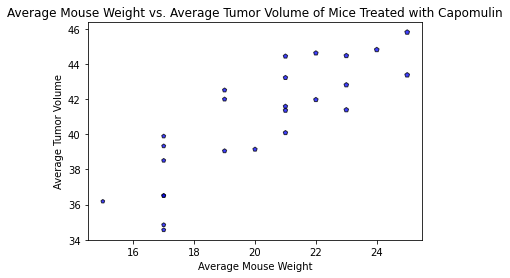

In [45]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = merge_mean_weight_volume_df["Weight_(g)"]
y_axis = merge_mean_weight_volume_df["Tumor_Volume_(mm3)"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Average Mouse Weight vs. Average Tumor Volume of Mice Treated with Capomulin")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient
weight = merge_mean_weight_volume_df.iloc[:,1]
volume = merge_mean_weight_volume_df.iloc[:,2]
correlation = st.pearsonr(weight, volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


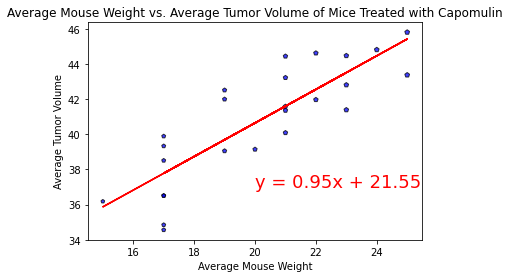

In [47]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = merge_mean_weight_volume_df["Weight_(g)"]
y_values = merge_mean_weight_volume_df["Tumor_Volume_(mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=18,color="red")
plt.title("Average Mouse Weight vs. Average Tumor Volume of Mice Treated with Capomulin")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.show()

In [48]:
#Three Observations
#1) Capomulin and Ramicane had the most data points (230 and 228, respectively).
#2) Capomulin and Ramicane appear to have resulted in a lower tumor volume at the last time point relative to  Infubinol and Ceftamin (see box plots).
#3) In mice treated with Capomulin, larger mice tended to have larger tumors.
#4) Mouse s185 appears to be succesffuly treated (e.g., tumor volume was reduced) with the drug Capomulin.